In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [3]:
def visualize_tasks(results, submit_time=None, saveas=None):
    
    df = pd.DataFrame(results)

    if submit_time is None:
        submit_time = df['start'].min()
    
    df['elapsed'] = df['end'] - df['start']
    df['end'] = df['end'] - submit_time
    df['start'] = df['start'] - submit_time
    
    df = df.sort_values('start')
    
    pids = df.pid.unique()
    fig, ax = plt.subplots(figsize=(14, len(pids)))
    
    yticks = []
    yticklabels = []
    npid = 0
    
    # TODO groupby node
    for pid, group in df.groupby('pid'):
        yticks.append(npid)
        
        tl = "%s:%d" % (group['node'].unique()[0], pid)
#         tl = "%s:%d" % ("node", group['pid'])
#         print(tl)
#         print(group['pid'])
        yticklabels.append(tl)
        for t0, tel in zip(group['start'], group['elapsed']):
            ax.add_patch(plt.Rectangle((t0, npid-0.25),
                                       tel, 0.5, color="green", lw=0.5, alpha=0.5))
        npid += 1
        
    ax.set_ylim(-.5, npid - 1 + .5)
    ax.set_xlim(0, df['end'].max())
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    ax.set_ylabel("PID")
    ax.set_xlabel("seconds")
    
    if saveas:
        fig.saveas(saveas)
    
    return df

## WOW:-P

In [5]:
from cloudpickle import load

In [8]:
res = load(open('nersc_test_sleep_N2', mode='rb'))

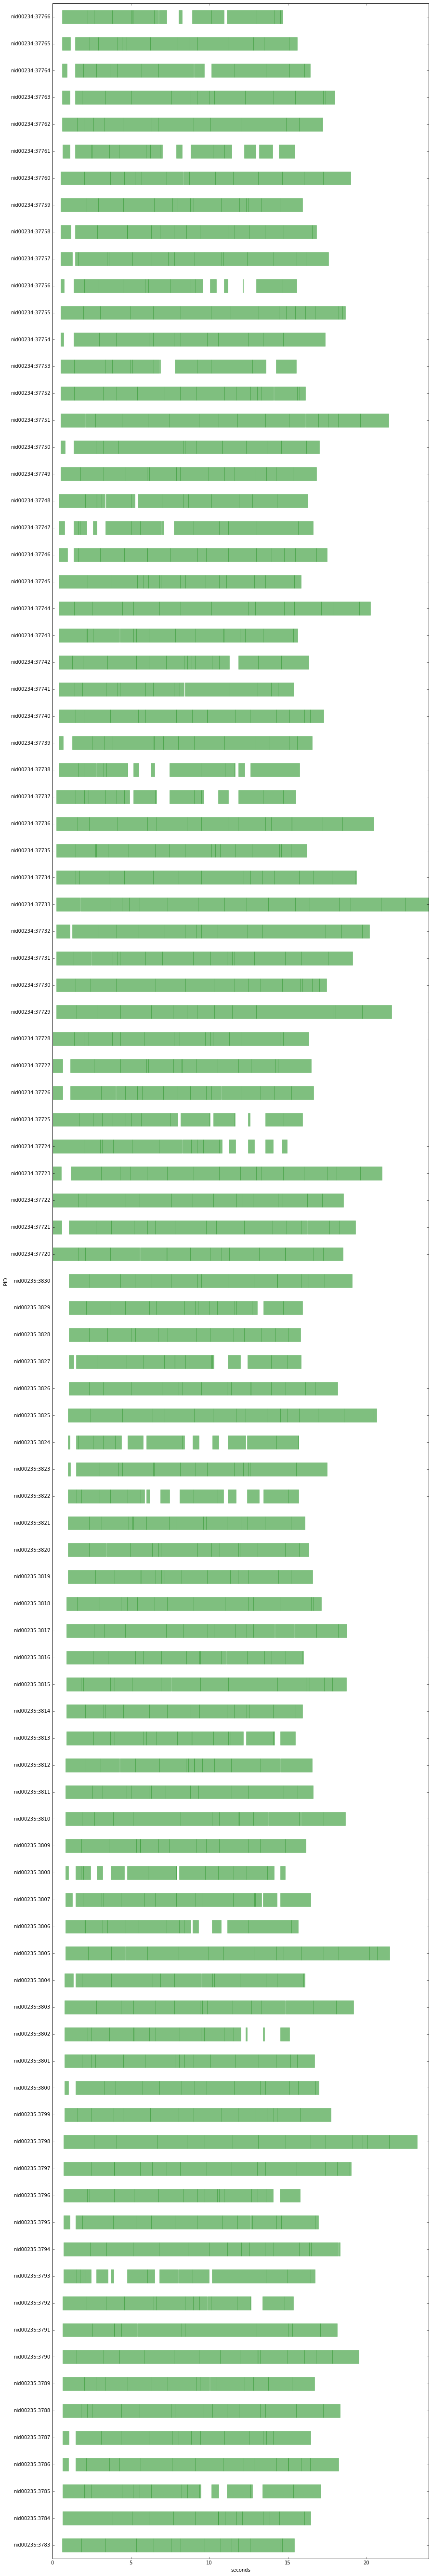

In [9]:
df_w = visualize_tasks(res['out'][0])

In [10]:
res['out'][0]

[{'end': 1468531714.820363,
  'inp': 0,
  'node': 'nid00234',
  'pid': 37720,
  'sleep': 1.571739485201758,
  'start': 1468531713.190888},
 {'end': 1468531713.779539,
  'inp': 1,
  'node': 'nid00234',
  'pid': 37721,
  'sleep': 0.3441890996592185,
  'start': 1468531713.1922},
 {'end': 1468531714.843297,
  'inp': 2,
  'node': 'nid00234',
  'pid': 37722,
  'sleep': 1.581659730047431,
  'start': 1468531713.203508},
 {'end': 1468531713.746538,
  'inp': 3,
  'node': 'nid00234',
  'pid': 37723,
  'sleep': 0.1925044161818481,
  'start': 1468531713.20279},
 {'end': 1468531715.185556,
  'inp': 4,
  'node': 'nid00234',
  'pid': 37724,
  'sleep': 1.9478317039201365,
  'start': 1468531713.196038},
 {'end': 1468531714.896885,
  'inp': 5,
  'node': 'nid00234',
  'pid': 37725,
  'sleep': 1.6550661695221707,
  'start': 1468531713.202091},
 {'end': 1468531713.826834,
  'inp': 6,
  'node': 'nid00234',
  'pid': 37726,
  'sleep': 0.45960529738730993,
  'start': 1468531713.198448},
 {'end': 1468531713.8466